In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.static import teams

# Get official NBA team IDs (franchises only)
nba_teams = teams.get_teams()
nba_team_ids = [team["id"] for team in nba_teams]

# Define fetch function
def fetch_season_stats(season, measure_type="Advanced"):
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=season,
        measure_type_detailed_defense=measure_type
    )
    df = stats.get_data_frames()[0]

    # Filter to only real NBA franchises
    df = df[df["TEAM_ID"].isin(nba_team_ids)]

    # Add season column for tracking
    df["SEASON"] = season
    
    return df

# Build season list
seasons = [f"{year}-{str(year+1)[-2:]}" for year in range(2000, 2025)]

# Loop through seasons and collect
all_data = []
for season in seasons:
    df = fetch_season_stats(season, measure_type="Advanced")
    all_data.append(df)
    time.sleep(0.6)

# Combine everything into one DataFrame
final_df = pd.concat(all_data, ignore_index=True)

# Keep only relevant columns
final_df = final_df.drop(["TEAM_ID", "MIN", "E_OFF_RATING", "E_DEF_RATING", "E_NET_RATING", "E_PACE", "PACE_PER40", "GP_RANK"], axis=1)

final_df.to_csv("finalized_NBA_data.csv", index=False)

# Offensive & Defensive Ratings
# 'OFF_RATING', 'DEF_RATING', 'NET_RATING' 
 
# Assists
# 'AST_PCT', 'AST_TO', 'AST_RATIO' 

# Rebounding
# 'OREB_PCT', 'DREB_PCT', 'REB_PCT' 

# Turnovers
# 'TM_TOV_PCT' 

# Field Goals
# 'EFG_PCT', 'TS_PCT' 

# Pace
# 'PACE', 'POSS', 'PIE' 

# Rankings
# 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK', 
# 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 
# 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK'

In [8]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.static import teams

# Get official NBA team IDs (franchises only)
nba_teams = teams.get_teams()
nba_team_ids = [team["id"] for team in nba_teams]

# Define fetch function
def fetch_season_stats(season):
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=season,
    )
    df = stats.get_data_frames()[0]

    # Filter to only real NBA franchises
    df = df[df["TEAM_ID"].isin(nba_team_ids)]

    # Add season column for tracking
    df["SEASON"] = season
    
    return df

# Build season list
seasons = [f"{year}-{str(year+1)[-2:]}" for year in range(2000, 2025)]

# Loop through seasons and collect
all_data = []
for season in seasons:
    df = fetch_season_stats(season)
    all_data.append(df)
    time.sleep(0.6)  # avoid API rate limit

# Combine everything into one DataFrame
final_df = pd.concat(all_data, ignore_index=True)

# Keep relavant columns
final_df = final_df.drop(["TEAM_ID", "MIN", "GP_RANK", "MIN_RANK"], axis=1)

final_df.to_csv("basic_NBA_data.csv", index=False)

# Field Goals Attempted: FGA, FG3A, FTA
# --- Record ---
# GP            Games Played
# W             Wins
# L             Losses
# W_PCT         Win Percentage

# --- Field Goals ---
# FGM           Field Goals Made
# FGA           Field Goals Attempted
# FG_PCT        Field Goal Percentage

# --- Three-Pointers ---
# FG3M          3-Point Field Goals Made
# FG3A          3-Point Field Goals Attempted
# FG3_PCT       3-Point Field Goal Percentage

# --- Free Throws ---
# FTM           Free Throws Made
# FTA           Free Throws Attempted
# FT_PCT        Free Throw Percentage

# --- Rebounds ---
# OREB          Offensive Rebounds
# DREB          Defensive Rebounds
# REB           Total Rebounds

# --- Playmaking ---
# AST           Assists
# TOV           Turnovers

# --- Defense ---
# STL           Steals
# BLK           Blocks
# BLKA          Blocked Against (your shot was blocked)

# --- Fouls ---
# PF            Personal Fouls committed
# PFD           Personal Fouls Drawn (when you get fouled)

# --- Scoring ---
# PTS           Points scored
# PLUS_MINUS    Point differential when on the court

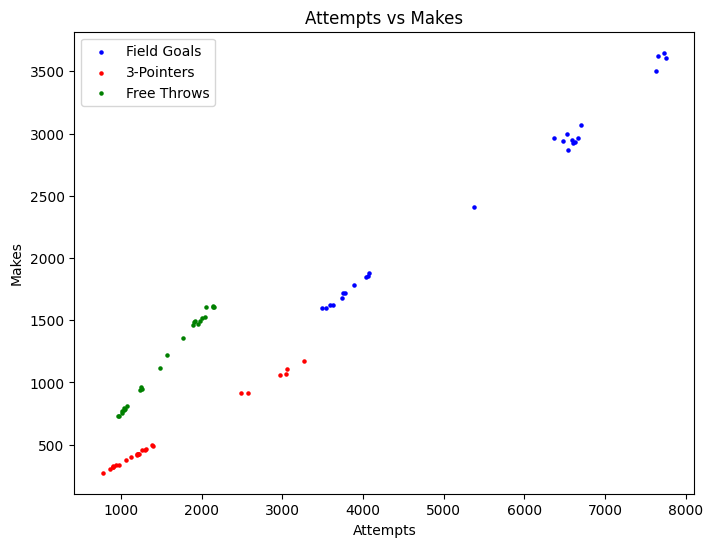

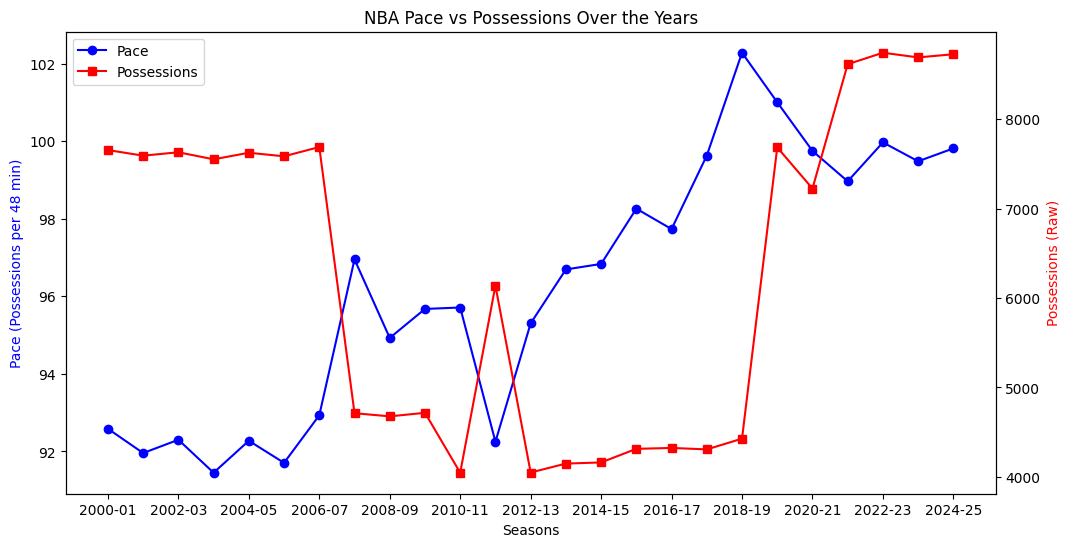

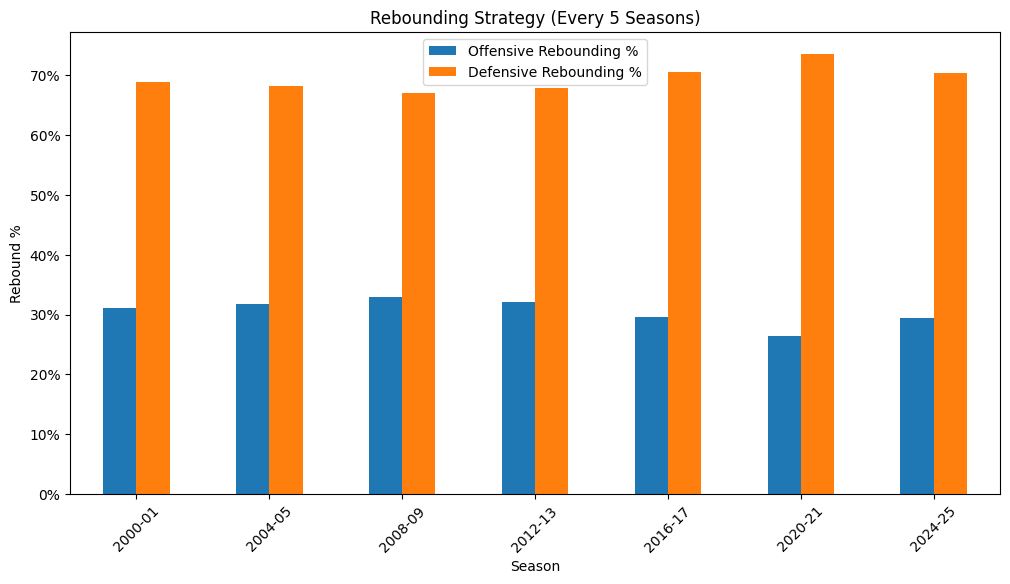

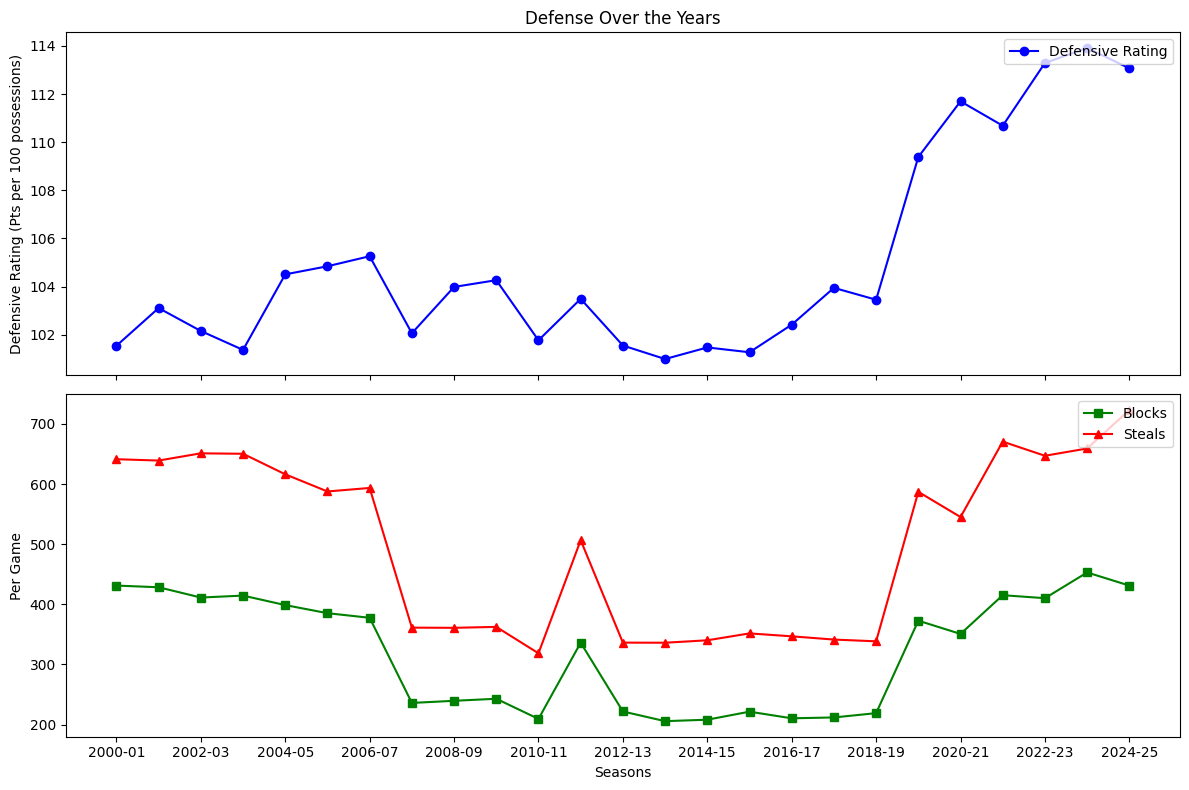

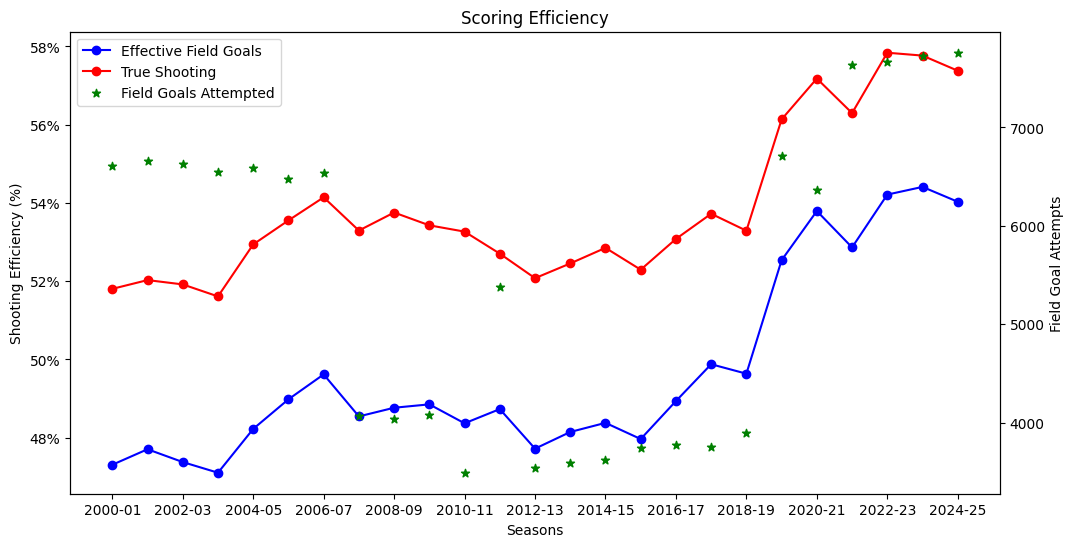

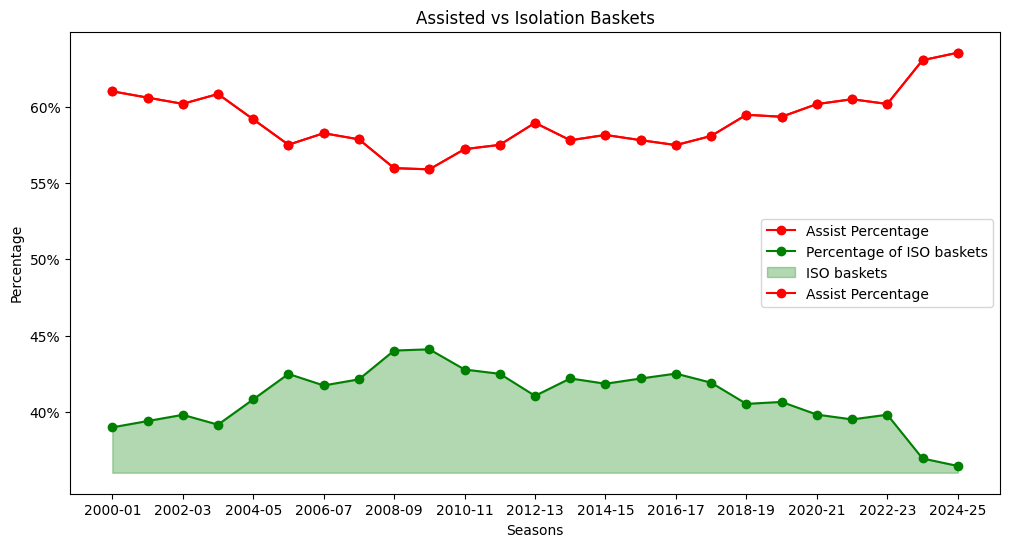

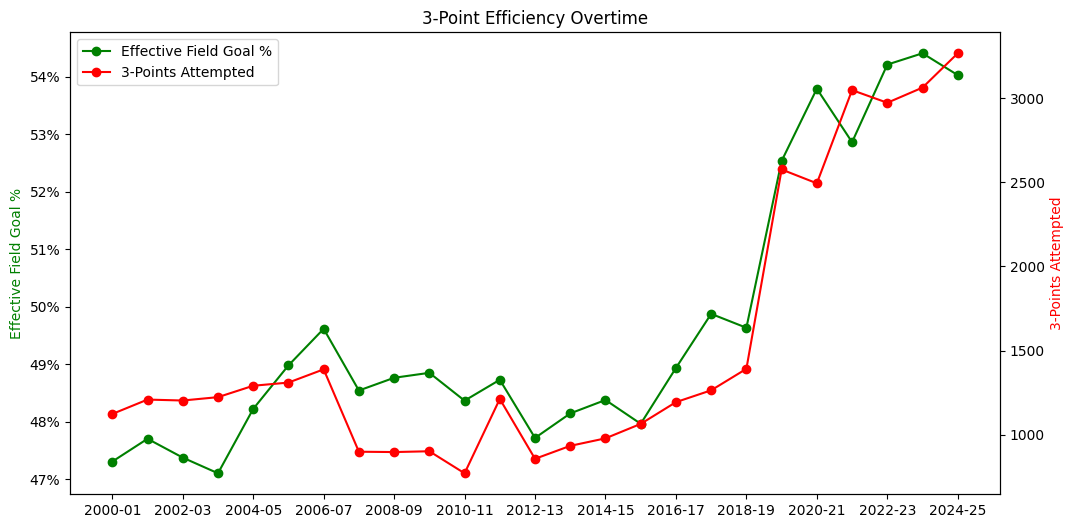

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Offensive & Defensive Ratings
# 'OFF_RATING', 'DEF_RATING', 'NET_RATING' 
 
# Assists
# 'AST_PCT', 'AST_TO', 'AST_RATIO' 

# Rebounding
# 'OREB_PCT', 'DREB_PCT', 'REB_PCT' 

# Turnovers
# 'TM_TOV_PCT' 

# Field Goals
# 'EFG_PCT', 'TS_PCT' 

# Pace
# 'PACE', 'POSS', 'PIE' 


# --- Record ---
# GP            Games Played
# W             Wins
# L             Losses
# W_PCT         Win Percentage

# --- Field Goals ---
# FGM           Field Goals Made
# FGA           Field Goals Attempted
# FG_PCT        Field Goal Percentage

# --- Three-Pointers ---
# FG3M          3-Point Field Goals Made
# FG3A          3-Point Field Goals Attempted
# FG3_PCT       3-Point Field Goal Percentage

# --- Free Throws ---
# FTM           Free Throws Made
# FTA           Free Throws Attempted
# FT_PCT        Free Throw Percentage

# --- Rebounds ---
# OREB          Offensive Rebounds
# DREB          Defensive Rebounds
# REB           Total Rebounds

# --- Playmaking ---
# AST           Assists
# TOV           Turnovers

# --- Defense ---
# STL           Steals
# BLK           Blocks
# BLKA          Blocked Against (your shot was blocked)

# --- Fouls ---
# PF            Personal Fouls committed
# PFD           Personal Fouls Drawn (when you get fouled)

# --- Scoring ---
# PTS           Points scored
# PLUS_MINUS    Point differential when on the court

final_data1 = pd.read_csv("finalized_NBA_data.csv")
final_data2 = pd.read_csv("basic_NBA_data.csv")
final_df = pd.concat([final_data1, final_data2])



# Field Goals
fig, ax = plt.subplots(figsize=(8,6))

FGA = final_df.groupby("SEASON")[["FGA", "FG3A", "FTA"]].mean()
FGM = final_df.groupby("SEASON")[["FGM", "FG3M", "FTM"]].mean()

# Scatter
ax.scatter(FGA["FGA"], FGM["FGM"], color="blue", label="Field Goals", s=5)
ax.scatter(FGA["FG3A"], FGM["FG3M"], color="red", label="3-Pointers", s=5)
ax.scatter(FGA["FTA"], FGM["FTM"], color="green", label="Free Throws", s=5)

ax.set_xlabel("Attempts")
ax.set_ylabel("Makes")
ax.set_title("Attempts vs Makes")
ax.legend()
plt.show()


# Pace
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx() 

Pace = final_df.groupby("SEASON")[["PACE", "POSS"]].mean()
ax1.plot(Pace.index, Pace["PACE"], color="blue", marker="o", label="Pace")
ax2.plot(Pace.index, Pace["POSS"], color="red", marker="s", label="Possessions")

ax1.set_xlabel("Seasons")
ax1.set_ylabel("Pace (Possessions per 48 min)", color="blue")
ax2.set_ylabel("Possessions (Raw)", color="red")

plt.title("NBA Pace vs Possessions Over the Years")
ax1.set_xticks(Pace.index[::2])
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
plt.show()


# Rebounds: 'OREB_PCT', 'DREB_PCT'
Reb = final_df.groupby("SEASON")[["OREB_PCT", "DREB_PCT"]].mean() * 100
Reb5 = Reb.iloc[::4]

ax = Reb5.plot(kind="bar", figsize=(12,6))
plt.title("Rebounding Strategy (Every 5 Seasons)")
plt.ylabel("Rebound %")
plt.xlabel("Season")
plt.legend(["Offensive Rebounding %", "Defensive Rebounding %"])
ax.set_yticks(range(0, 71, 10))
ax.set_yticklabels([f"{i}%" for i in range(0, 71, 10)])
plt.xticks(rotation=45)
plt.show()



# Defense
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top plot: Defensive Rating
DefRating = final_df.groupby("SEASON")[["DEF_RATING"]].mean()
ax1.plot(DefRating.index, DefRating["DEF_RATING"], color="blue", marker="o", label="Defensive Rating")
ax1.set_ylabel("Defensive Rating (Pts per 100 possessions)")
ax1.set_title("Defense Over the Years")
ax1.legend(loc="upper right")

# Bottom plot: Blocks & Steals
Def = final_df.groupby("SEASON")[["BLK", "STL"]].mean()
ax2.plot(Def.index, Def["BLK"], color="green", marker="s", label="Blocks")
ax2.plot(Def.index, Def["STL"], color="red", marker="^", label="Steals")
ax2.set_ylabel("Per Game")
ax2.set_xlabel("Seasons")
ax2.legend(loc="upper right")

ax2.set_xticks(Def.index[::2])  

plt.tight_layout()
plt.show()



# EFG_PCT & TS_PCT
fig, ax1 = plt.subplots(figsize=(12,6))

Shooting = final_df.groupby("SEASON")[["EFG_PCT", "TS_PCT", "FGA"]].mean()
Shooting[["EFG_PCT", "TS_PCT"]] *= 100
ax1.plot(Shooting.index, Shooting["EFG_PCT"], color="blue", marker="o", label="Effective Field Goals")
ax1.plot(Shooting.index, Shooting["TS_PCT"], color="red", marker="o", label="True Shooting")
ax1.set_ylabel("Shooting Efficiency (%)")

ax2 = ax1.twinx()
ax2.scatter(Shooting.index, Shooting["FGA"], marker="*", color="green", label="Field Goals Attempted")
ax2.set_ylabel("Field Goal Attempts")

ax1.set_xticks(Shooting.index[::2])
ax1.set_yticks(range(48, 59, 2))
ax1.set_yticklabels([f"{i}%" for i in range(48, 59, 2)])
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
plt.title("Scoring Efficiency")
ax1.set_xlabel("Seasons")
plt.show()


# Assists and ISO
fig, ax1 = plt.subplots(figsize=(12,6))

Assist = final_df.groupby("SEASON")[["AST", "FGM"]].sum()
assistPct = (Assist["AST"] / Assist["FGM"]) * 100

ISO = final_df.groupby("SEASON")[["AST", "FGM"]].sum()
isoPct = ((ISO["FGM"] - ISO["AST"]) / ISO["FGM"]) * 100

ax1.plot(Assist.index, assistPct, marker="o", color="red", label="Assist Percentage")
ax1.plot(ISO.index, isoPct, marker="o", color="green", label="Percentage of ISO baskets")
ax1.set_yticks(range(40, 61, 5))
ax1.set_yticklabels([f"{i}%" for i in range(40, 61, 5)])
ax1.set_xticks(Assist.index[::2])
ax1.fill_between(Assist.index, 36, isoPct, color="green", alpha=0.3, label="ISO baskets")
ax1.plot(Assist.index, assistPct, marker="o", color="red", label="Assist Percentage")

plt.xlabel("Seasons")
plt.ylabel("Percentage")
plt.title("Assisted vs Isolation Baskets")
plt.legend()
plt.show()


# EFG_PCT with 3pt attempts or made
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()

EFG = final_df.groupby("SEASON")[["EFG_PCT"]].mean() * 100
ax1.plot(EFG.index, EFG["EFG_PCT"], color="green", marker="o", label="Effective Field Goal %")
ax1.set_yticks(range(47, 55, 1))
ax1.set_yticklabels([f"{i}%" for i in range(47, 55, 1)])
ax1.set_ylabel("Effective Field Goal %", color="green")

threePt = final_df.groupby("SEASON")[["FG3A", "FG3M"]].mean()
ax2.plot(threePt.index, threePt["FG3A"], color="red", marker="o", label="3-Points Attempted")
ax2.set_xticks(threePt.index[::2])
ax2.set_ylabel("3-Points Attempted", color="red")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper left")
plt.title("3-Point Efficiency Overtime")
plt.show()


In [1]:
import pandas as pd

df = pd.read_csv('basic_NBA_data.csv')

df["PFD"].isna().mean()

np.float64(0.0)